# Recruit Restaurant Visitor Forecasting

## Part 3: KNN Classifier by region and weather data(EDA)

1.1 Load libraries

In [6]:
import numpy as np 
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

1.2 Load all the data and aggregation

In [16]:
airres = pd.read_csv('./input/air_reserve.csv')
airvisit = pd.read_csv('./input/air_visit_data.csv')
airstore = pd.read_csv('./input/air_store_info.csv')
hpgres = pd.read_csv('./input/hpg_reserve.csv')
hpgstore = pd.read_csv('./input/hpg_store_info.csv')
rel = pd.read_csv('./input/store_id_relation.csv')

In [17]:
airres.head(1)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1


In [18]:
airvisit.head(1)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25


In [24]:
df_air = pd.merge(airres,airstore,on='air_store_id')
df_airvis = pd.merge(airvisit,airstore,on='air_store_id')
df_hpg = pd.merge(hpgres,hpgstore,on='hpg_store_id')
print(df_air.shape)
print(df_airvis.shape)
print(df_hpg.shape)

(92378, 8)
(252108, 7)
(871308, 8)


In [25]:
df_air.head(1)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [26]:
df_airvis.head(1)

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [27]:
df_hpg.head(1)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698


In [31]:
df_airrel = pd.merge(df_air,rel,how='left',on='air_store_id')
df_hpgrel = pd.merge(df_hpg,rel,how='left',on='hpg_store_id')
df_full = pd.merge(df_airrel,df_hpgrel,how='outer')
print("there are ",len(df_air)," restaurants with AIR and ",len(df_hpg)," with HPG.",len(rel),' have both.')
print(df_airrel.shape)
print(df_hpgrel.shape)
print(df_full.shape)

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.
(92378, 9)
(871308, 9)
(963686, 11)


In [34]:
df_full.head(1)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN


In [35]:
df_full.describe()

,reserve_visitors,latitude,longitude
count,963686.000000,963686.000000,963686.000000
mean,5.253537,35.901246,137.469843
std,5.810087,2.349505,3.354441
min,1.000000,33.211967,130.339313
25%,2.000000,34.692109,135.483426
50%,3.000000,35.646745,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,44.020632,144.273398


## 1.1 KNN Clustering by region in Japan

Geography and Clustering

Apparently Japan's terittory is divided in 8 regions which are not official administrative units, but have been traditionally used as the regional division of Japan in a number of contexts [https://en.wikipedia.org/wiki/List_of_regions_of_Japan ]
From north to south, the traditional regions are:
Hokkaidō (the island of Hokkaidō and nearby islands, population: 5,507,456, largest city: Sapporo)
Tōhoku region (northern Honshū, population: 9,335,088, largest city: Sendai)
Kantō region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
Chūbu region (central Honshū, including Mt. Fuji, population: 21,714,995, largest city: Nagoya), sometimes divided into:
Hokuriku region (northwestern Chūbu, largest city: Kanazawa)
Kōshin'etsu region (northeastern Chūbu, largest city: Niigata)
Tōkai region (southern Chūbu, largest city: Nagoya)
Kansai or Kinki region (west-central Honshū, including the old capital, Kyoto, population: 22,755,030, largest city: Osaka)

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_full[['longitude','latitude']])
df_full['cluster'] = kmeans.predict(df_full[['longitude','latitude']])

In [38]:
df_full.head(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name,cluster
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
5,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-08 21:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
6,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-05 13:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
7,air_877f79706adbfb06,2016-01-09 20:00:00,2016-01-06 23:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
8,air_877f79706adbfb06,2016-01-09 21:00:00,2016-01-09 21:00:00,4,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0
9,air_877f79706adbfb06,2016-01-09 22:00:00,2016-01-05 12:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0


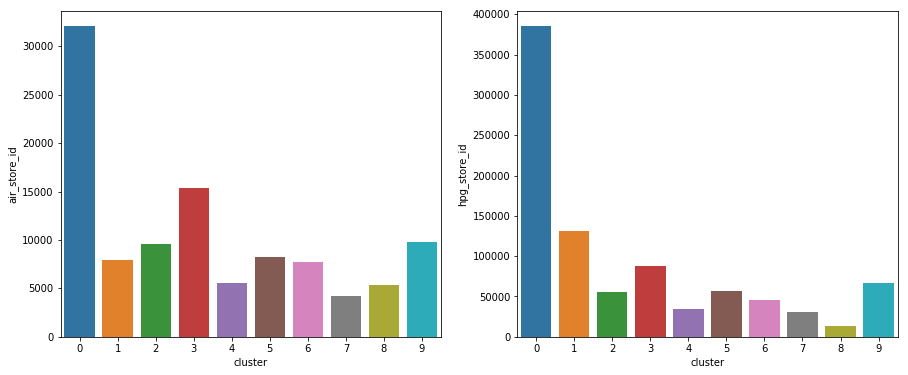

In [39]:
f,axa = plt.subplots(1,2,figsize=(15,6))
hist_clust = df_full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster,y=hist_clust.air_store_id,ax=axa[0])
sns.barplot(x=hist_clust.cluster,y=hist_clust.hpg_store_id,ax=axa[1])
plt.show()

In [44]:
#import os
#os.environ["PROJ_LIB"] = "C:\\Users\\gali\\Anaconda3\\Library\\share";
#from mpl_toolkits.basemap import Basemap

In [45]:
#m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

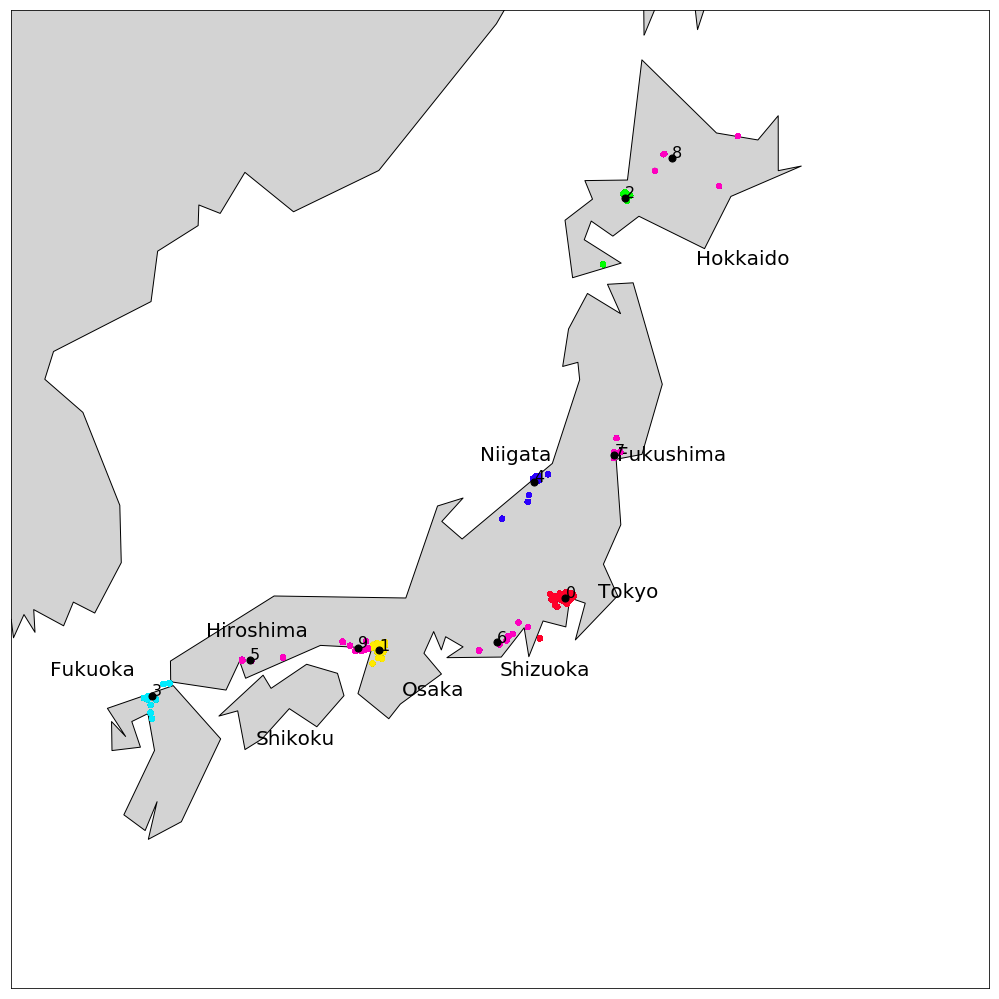

In [46]:
cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]
cm = plt.get_cmap('gist_rainbow')

colors = [cm(2.*i/10) for i in range(10)]
colored = [colors[k] for k in df_full['cluster']]
f,axa = plt.subplots(1,1,figsize=(20,18))
m.drawcoastlines()
m.fillcontinents(color='lightgray',lake_color='aqua',zorder=1)

m.scatter(df_full.longitude.values,df_full.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
#m.scatter(df_full.longitude.values,df_full.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
m.scatter(cx,cy,color='Black',s=50,alpha=1,latlon=True,zorder=999)
plt.setp(axa.get_yticklabels(), visible=True)
plt.annotate('Fukuoka', xy=(0.04, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Shikoku', xy=(0.25, 0.25), xycoords='axes fraction',fontsize=20)
plt.annotate('Hiroshima', xy=(0.2, 0.36), xycoords='axes fraction',fontsize=20)
plt.annotate('Osaka', xy=(0.40, 0.30), xycoords='axes fraction',fontsize=20)
plt.annotate('Tokyo', xy=(0.60, 0.4), xycoords='axes fraction',fontsize=20)
plt.annotate('Shizuoka', xy=(0.50, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Niigata', xy=(0.48, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Fukushima', xy=(0.62, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Hokkaido', xy=(0.7, 0.74), xycoords='axes fraction',fontsize=20)


for i in range(len(cx)):
    xpt,ypt = m(cx[i],cy[i])
    plt.annotate(i, (xpt+500,ypt+500),zorder=99999,fontsize=16)
plt.show()

## 1.2. Weather Data

In [52]:
df_weather = pd.read_csv('WeatherData.csv')
df_weather.head(2)

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
0,fukuoka_dazaifu-kana_dasaif,1/1/16,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1
1,fukuoka_dazaifu-kana_dasaif,1/2/16,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1


In [61]:
import re
def area2group(area):
    if re.match(r'tokyo.*',area) !=None:
        return 0
    if re.match(r'osaka.*',area) !=None:
        return 1
    if re.match(r'hokkaido.*',area) !=None:
        return 2    
    if re.match(r'fukuoka.*',area) !=None:
        return 3
    if re.match(r'niigata.*',area) !=None:
        return 4
    if re.match(r'hiroshima.*',area) !=None:
        return 5
    if re.match(r'shizuoka.*',area) !=None:
        return 6
    if re.match(r'miyagi.*',area) !=None:
        return 7
    else:
        return -1
    
warea = [area2group(area) for area in df_weather.area_name]
df_weather['cluster'] = warea


In [62]:
df_weather.head(2)

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature,cluster
0,fukuoka_dazaifu-kana_dasaif,1/1/16,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1,3
1,fukuoka_dazaifu-kana_dasaif,1/2/16,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1,3


# 2.3 Distribution of visitors in the AIR system

In [42]:
airvisit.visit_date =pd.to_datetime(airvisit.visit_date)

Text(0, 0.5, 'Ave of visitors')

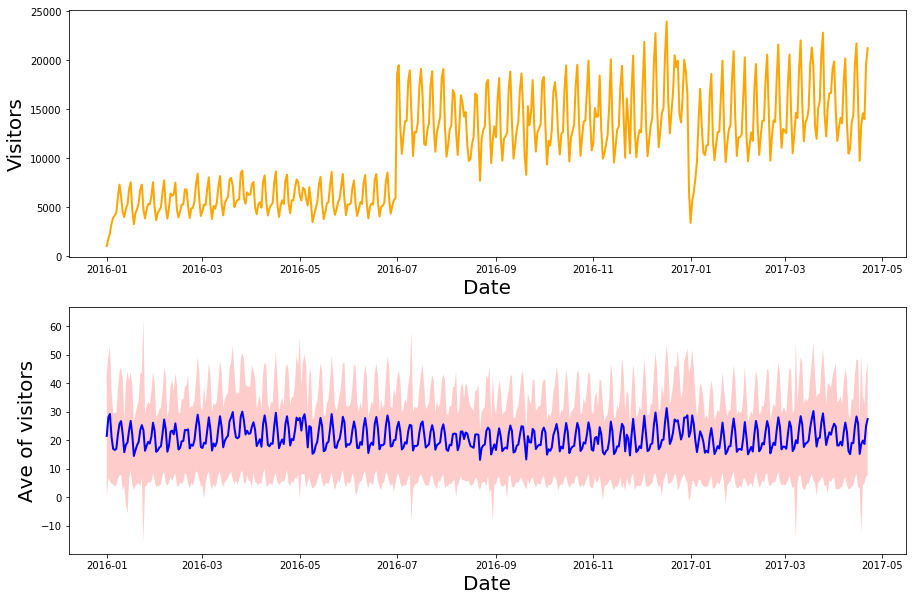

In [45]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
temp = airvisit.groupby(['visit_date']).sum()
ax1.plot(temp,'orange',linewidth=2)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Visitors',fontsize=20)

ax2 = fig.add_subplot(212)
temp = airvisit.groupby(['visit_date']).mean()
ax2.plot(temp.index,temp.values,'blue',linewidth=2)
error = airvisit.groupby(['visit_date']).std()
ax2.fill_between(temp.index,(temp.values-error.values).T[0], (temp.values+error.values).T[0],
                facecolor='red', alpha=0.2)
ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel('Ave of visitors',fontsize=20)

Text(0, 0.5, 'Sum(Date per each store)')

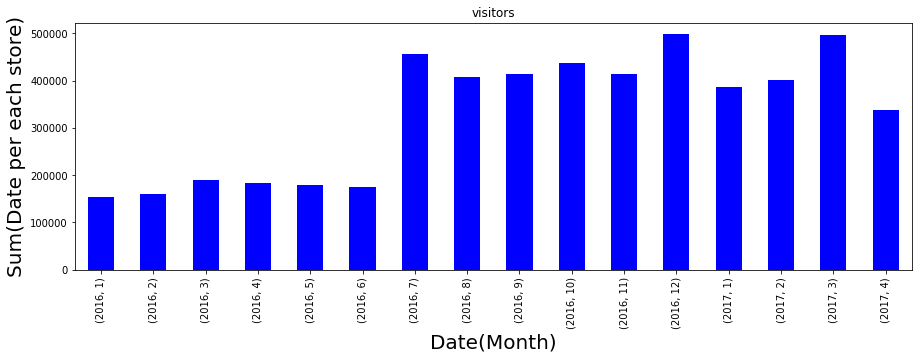

In [52]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(211)
a = airvisit.groupby([(airvisit.visit_date.dt.year), 
                       (airvisit.visit_date.dt.month)]).sum()['visitors']
a.plot(kind='bar', width=0.5, figsize=(10,5), legend=None, 
       subplots=True, ax=ax1, title=None, color='blue')
plt.xlabel("Date(Month)", fontsize=20)
plt.ylabel("Sum(Date per each store)", fontsize=20)

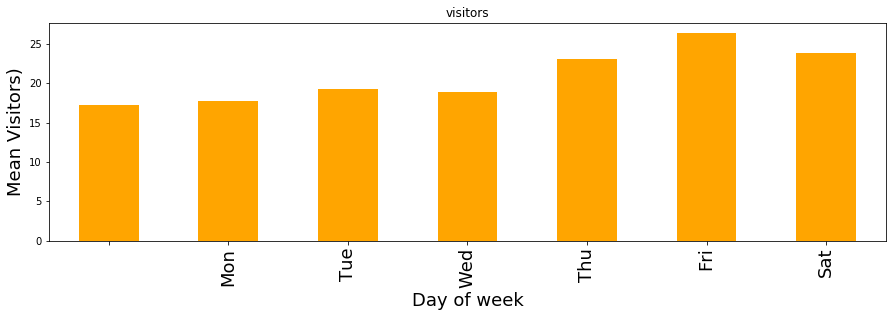

In [64]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").mean()['visitors']
day_p.plot(kind='bar', color='orange', figsize=(10,5), legend=None, 
           subplots=True, ax=ax2, use_index=False, linewidth=3)
plt.ylabel("Mean Visitors)",fontsize=18)
plt.xlabel("Day of week",fontsize=18)
ax2.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

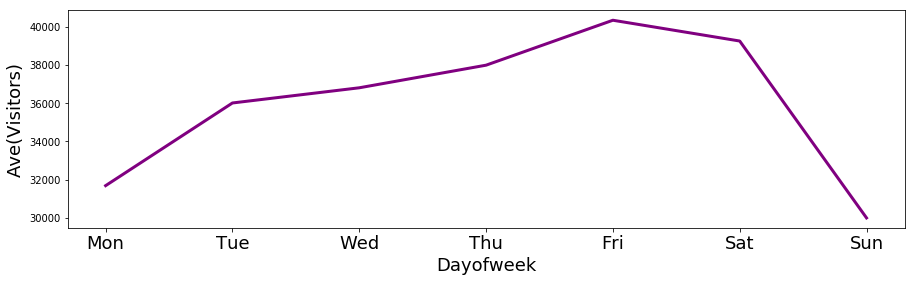

In [66]:
fig = plt.figure(figsize=(15,10))

ax2 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").count()['visitors']
day_p.plot(kind='line', color='purple', figsize=(10,5), legend=None, 
           subplots=True, ax=ax2, use_index=False, linewidth=3)
plt.ylabel("Ave(Visitors)",fontsize=18)
plt.xlabel("Dayofweek",fontsize=18)
ax2.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

# 2.4 Reservation distribution in systems

In [69]:
airres.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [71]:
hpgres.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [75]:
airres['visit_datetime']=pd.to_datetime(airres['visit_datetime'])
airres['reserve_datetime']=pd.to_datetime(airres['reserve_datetime'])
airres['visit_hour']=airres['visit_datetime'].dt.hour
airres['reserve_hour']=airres['reserve_datetime'].dt.hour

hpgres['visit_datetime']=pd.to_datetime(hpgres['visit_datetime'])
hpgres['reserve_datetime']=pd.to_datetime(hpgres['reserve_datetime'])
hpgres['visit_hour']=hpgres['visit_datetime'].dt.hour
hpgres['reserve_hour']=hpgres['reserve_datetime'].dt.hour

Text(0.5, 0, 'reserve_hour')

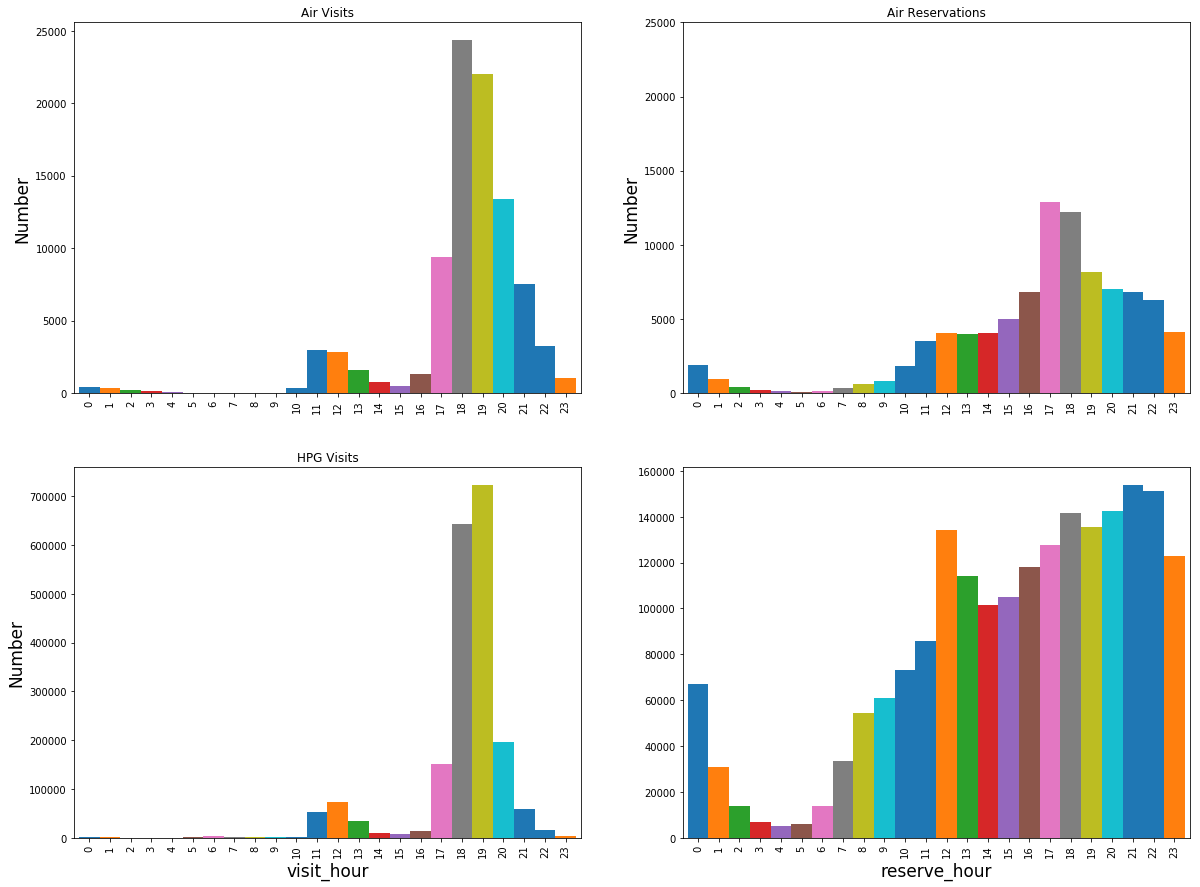

In [81]:
fig = plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
airres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Visits")

ax2=fig.add_subplot(222)
airres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax2)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Reservations")
plt.ylim(0,25000)

ax3=fig.add_subplot(223)
hpgres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("visit_hour",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("HPG Visits")

ax4=fig.add_subplot(224)
hpgres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax4)
plt.xlabel("reserve_hour",fontsize=17)